# Project Name :- Bike Rental

### Project Description -
Objective of the analysis is to find out the determining factor that drives the demand on bike share rentals, 
construct statistical models and then try to make prediction on rentals based on the information and models we have.
Exploration and the analysis of the data will be performed in R and Python.

### Loading Libraries & Data

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting working directory
os.chdir("C:/Users/Click/Desktop/Bike rental")
print(os.getcwd())

C:\Users\Click\Desktop\Bike rental


In [3]:
#Loading Dataset
data = pd.read_csv('Bike_Rental.csv')

In [4]:
data = pd.DataFrame(data)

In [5]:
#Creating Duplicate instances of data for Preprocessing and exploration
df = data.copy()

### Exploring Data

In [6]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#Checking info of data -> data types and rows n cols
data.info()

#This shows that we have no Missing Values for any column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


In [8]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#calculating number of unique values for all df columns
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
##We know that 'cnt' which is our target variable is sum of two other variables - 'registered' and 'casusal'. 
#'instant' variable is of no use and can be dropped
#'dteday' variable is a date column which is not significant in our analysis and can be excluded
#So we will drop these variables now itself
drop1 = ['casual', 'registered', 'instant', 'dteday']
data = data.drop(drop1, axis = 1)

In [12]:
# Variables are " Continuos" and "Categorical"
con = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

cat = ['season','yr','mnth',
                     'holiday','weekday', 'workingday', 'weathersit']

Text(0.5,1,'Bike Rental Statistics')

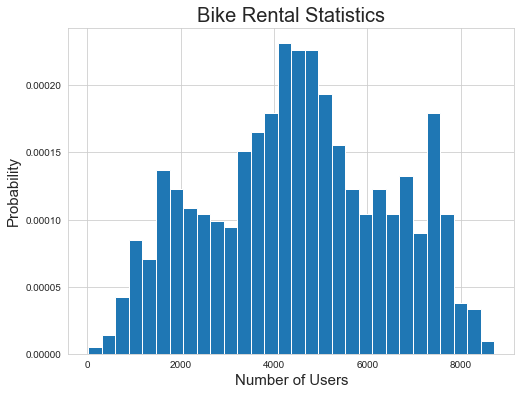

In [13]:
#Target Variable probability data distribution
plt.figure(figsize=(8,6))
plt.hist(data['cnt'], normed=True, bins=30)
plt.ylabel('Probability', fontsize= 15)
plt.xlabel('Number of Users', fontsize= 15)
plt.savefig("Count of Users.png")
plt.title("Bike Rental Statistics",fontsize= 20)

In [14]:
#Function to view the categories present in each categorical feature and thier values
def view_feature_cat(obj):
    for i in range(len(obj)):
        print('*******************************************')
        print('Feature:',obj[i])
        print('-----------------------')
        print(data[str(obj[i])].value_counts())
        print('*******************************************')

In [15]:
view_feature_cat(cat)

*******************************************
Feature: season
-----------------------
3    188
2    184
1    181
4    178
Name: season, dtype: int64
*******************************************
*******************************************
Feature: yr
-----------------------
1    366
0    365
Name: yr, dtype: int64
*******************************************
*******************************************
Feature: mnth
-----------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
*******************************************
*******************************************
Feature: holiday
-----------------------
0    710
1     21
Name: holiday, dtype: int64
*******************************************
*******************************************
Feature: weekday
-----------------------
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
**********************************

### Data Understanding

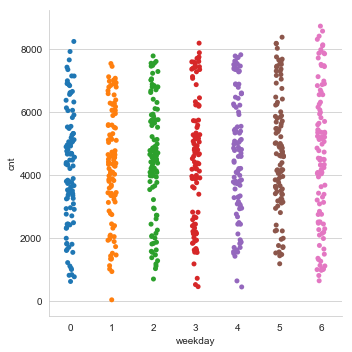

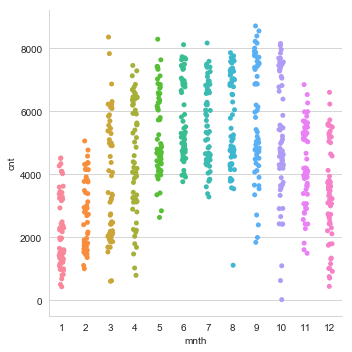

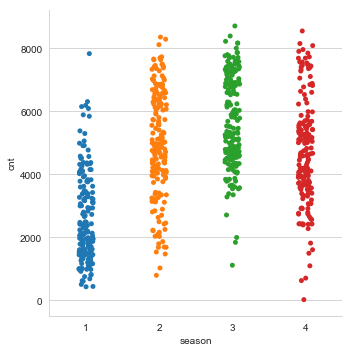

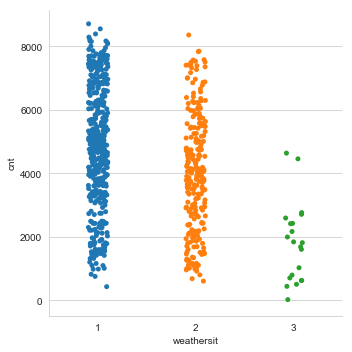

In [16]:
sns.catplot(x="weekday", y="cnt", data=data)
plt.savefig('days_bikecnt.png')

sns.catplot(x="mnth", y="cnt", data=data)
plt.savefig('mnth_bikecnt.png')

sns.catplot(x="season", y="cnt", data=data)
plt.savefig('season_bikecnt.png')

sns.catplot(x="weathersit", y="cnt", data=data)
plt.savefig('hol_bikecnt.png')

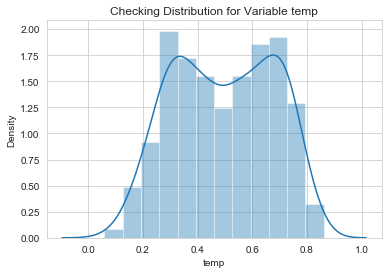

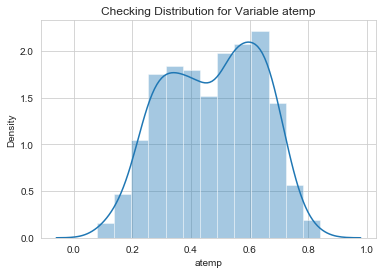

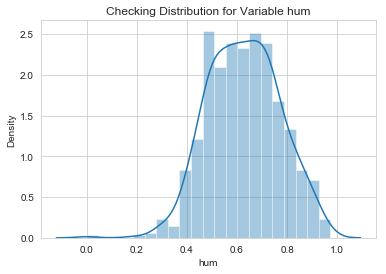

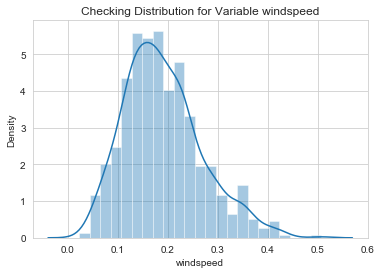

In [17]:
# Checking the distribution of values for variables in data
for i in con:
    if i == 'cnt':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

### OutLier Analysis

In [18]:
"""def box_plot(x):
    plt.boxplot(data[x])
    plt.xlabel(x,fontsize= 15)
    plt.ylabel('Values',fontsize= 15)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)
    plt.savefig("Boxplot for {X}.png".format(X=x))
    plt.show()
    box_plot('windspeed')
    box_plot('temp')
    box_plot('atemp')
    box_plot('hum')"""

'def box_plot(x):\n    plt.boxplot(data[x])\n    plt.xlabel(x,fontsize= 15)\n    plt.ylabel(\'Values\',fontsize= 15)\n    plt.xticks(fontsize=10, rotation=90)\n    plt.yticks(fontsize=10)\n    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)\n    plt.savefig("Boxplot for {X}.png".format(X=x))\n    plt.show()\n    box_plot(\'windspeed\')\n    box_plot(\'temp\')\n    box_plot(\'atemp\')\n    box_plot(\'hum\')'

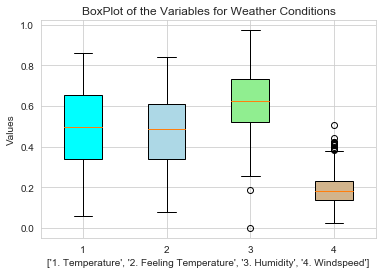

In [19]:
box=plt.boxplot([data['temp'], data['atemp'], data['hum'], data['windspeed']],patch_artist=True)
plt.xlabel(['1. Temperature', '2. Feeling Temperature', '3. Humidity', '4. Windspeed'])
plt.title("BoxPlot of the Variables for Weather Conditions")
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Values')
plt.savefig('BoxPlot of the Variables for Weather Conditions')

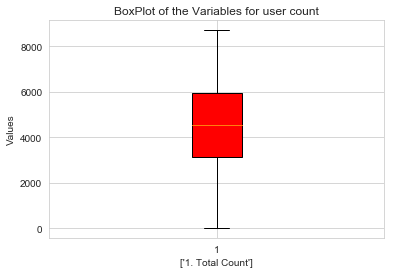

In [20]:
box2=plt.boxplot([data['cnt']],patch_artist=True)
plt.xlabel(['1. Total Count'])
plt.title("BoxPlot of the Variables for user count")
colors = ['red']
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Values')
plt.savefig('BoxPlot of the Variables for user count')

In [21]:
# From the above boxplot we can conclude that there are outliers windspeed variables

In [22]:
# Getting 75 and 25 percentile of variable "windspeed"
q75, q25 = np.percentile(data['windspeed'], [75,25])
# Calculating Interquartile range
iqr = q75 - q25
    
# Calculating upper extream and lower extream
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
    
# Replacing all the outliers value to NA
data.loc[data['windspeed']< minimum,'windspeed'] = np.nan
data.loc[data['windspeed']> maximum,'windspeed'] = np.nan

# Checking % of missing values
data.isnull().sum().sum()

13

In [23]:
#Checking missing values in train dataset
print(data.isnull().sum())
#result shows there are missing values in the dataset

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed     13
cnt            0
dtype: int64


In [24]:
##we will impute the missing values which was outlier values by using mean imputation
# we chose mean imputation because median imputation is majorly suitable for the data having outliers
## as we dont have outliers so we will choose mean imputation over KNN.

data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

In [25]:
print(data.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


### Feature Selection

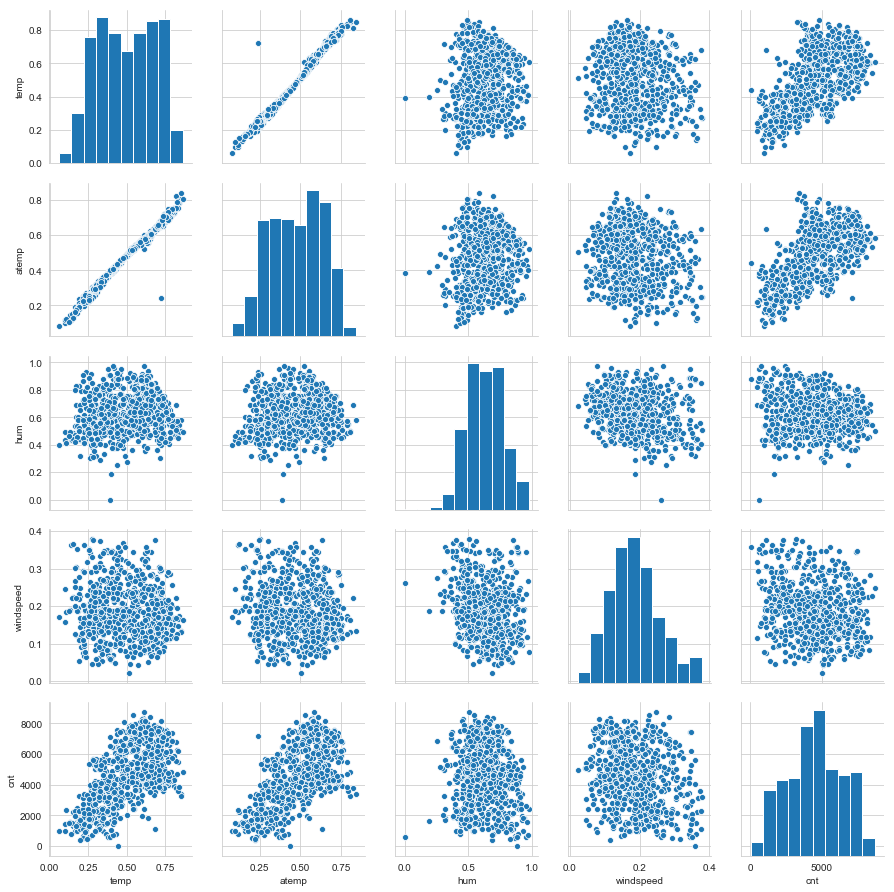

In [26]:
#Code for plotting pairplot
sns_plot = sns.pairplot(data=data[con])
plt.plot()
plt.savefig('Pairplot')

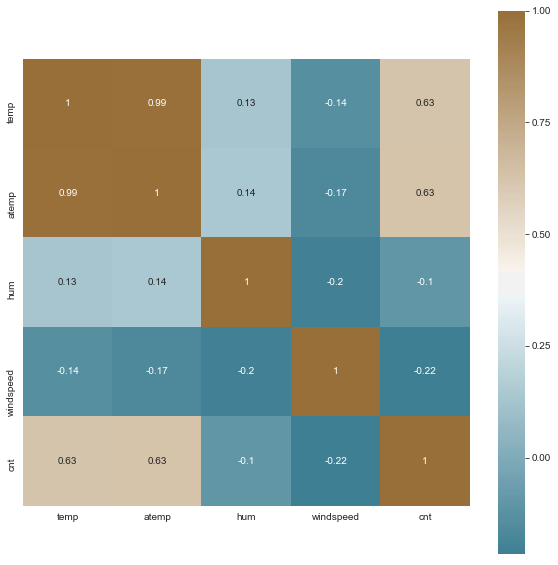

In [27]:
##Correlation analysis for continuous variables
#Correlation plot
data_corr = data.loc[:,con]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.savefig('Heatmap')

In [28]:
label = 'cnt'
obj_dtype = cat
drop_feat = []

## ANOVA TEST FOR P VALUES
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_p = []
for  i in obj_dtype:
    buf = label + ' ~ ' + i
    mod = ols(buf,data=data).fit()
    anova_op = sm.stats.anova_lm(mod, typ=2)
    print(anova_op)
    anova_p.append(anova_op.iloc[0:1,3:4])
    p = anova_op.loc[i,'PR(>F)']
    if p >= 0.05:
        drop_feat.append(i)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

In [29]:
drop_feat

['holiday', 'weekday', 'workingday']

In [30]:
#As a result of correlation analysis and ANOVA, we have concluded that we should remove 6 columns
#'temp' and 'atemp' are correlated and hence one of them should be removed
#'holiday', 'weekday' and 'workingday' have p>0.05 and hence should be removed

In [31]:
# Droping the variables which has redundant information
to_drop = ['atemp', 'holiday', 'weekday', 'workingday']
data = data.drop(to_drop, axis = 1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(3), int64(5)
memory usage: 45.7 KB


In [33]:
# Updating the Continuous and Categorical Variables after droping correlated variables
con = [i for i in con if i not in to_drop]
cat = [i for i in cat if i not in to_drop]

### Feature Scaling

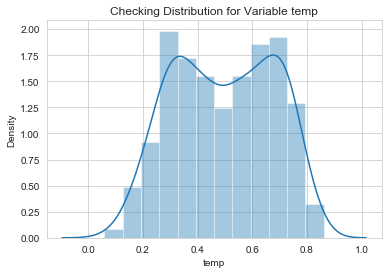

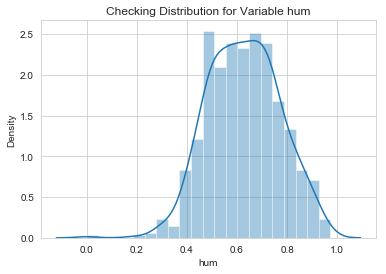

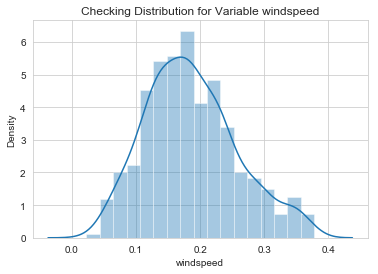

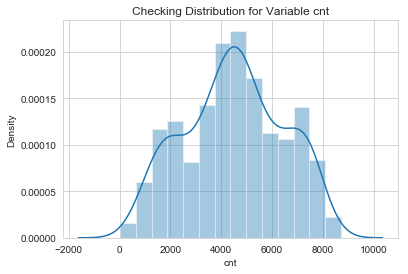

In [34]:
# Checking the distribution of values for variables in data
for i in con:
    if i == 'data':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

In [35]:
#Data before scaling
data.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600


In [36]:
# Since our data is normally distributed, we will use Standardization for Feature Scalling
# #Standardization
for i in con:
    if i == 'cnt':
        continue
    data[i] = (data[i] - data[i].mean())/(data[i].std())

In [37]:
#Data after scaling
data.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,-0.826097,1.249316,-0.364668,985
1,1,0,1,2,-0.720601,0.478785,0.873479,801
2,1,0,1,1,-1.633538,-1.338358,0.870246,1349
3,1,0,1,1,-1.613675,-0.263001,-0.366777,1562
4,1,0,1,1,-1.466410,-1.340576,0.007143,1600


#### Before going for modelling algorithms, we will create dummy variables for our categorical variables

In [38]:
dummy_data = pd.get_dummies(data = data, columns = cat)

#Copying dataframe
bike_data = dummy_data.copy()

In [39]:
dummy_data.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,-0.826097,1.249316,-0.364668,985,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.720601,0.478785,0.873479,801,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.633538,-1.338358,0.870246,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.613675,-0.263001,-0.366777,1562,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.466410,-1.340576,0.007143,1600,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Machine Learning algorithms

In [40]:
#Using train test split functionality for creating sampling
X_train, X_test, y_train, y_test = train_test_split(dummy_data.iloc[:, dummy_data.columns != 'cnt'], 
                         dummy_data.iloc[:, 3], test_size = 0.33, random_state=101)

In [41]:
(X_train.shape),(y_train.shape)

((489, 24), (489,))

### Decision Tree Regressor

In [42]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

DT_rmse = rmse_for_test
DT_mape = MAPE(y_test,pred_test)
DT_r2 = r2_score(y_test,pred_test)

print('Decision Tree Regressor Model Performance:')
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("MAPE(Mean Absolute Percentage Error) = "+str(DT_mape))


#Decision Tree Regressor Model Performance:
#Root Mean Squared Error For Test data = 997.3873927346699
#R^2 Score(coefficient of determination) = 0.7073525764693427
#MAPE(Mean Absolute Percentage Error) = 25.707144204754727

Decision Tree Regressor Model Performance:
Root Mean Squared Error For Test data = 997.3873927346699
R^2 Score(coefficient of determination) = 0.7073525764693427
MAPE(Mean Absolute Percentage Error) = 25.707144204754727


### Random Forest

In [43]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

RF_rmse = rmse_for_test
RF_mape = MAPE(y_test,pred_test)
RF_r2 = r2_score(y_test,pred_test)

print('Random Forest Regressor Model Performance:')
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("MAPE(Mean Absolute Percentage Error) = "+str(RF_mape))

#Random Forest Regressor Model Performance:
#Root Mean Squared Error For Test data = 567.4712836267795
#R^2 Score(coefficient of determination) = 0.9052662486980746
#MAPE(Mean Absolute Percentage Error) = 13.33175245911665

Random Forest Regressor Model Performance:
Root Mean Squared Error For Test data = 567.4712836267795
R^2 Score(coefficient of determination) = 0.9052662486980746
MAPE(Mean Absolute Percentage Error) = 13.33175245911665


### Linear Regression

In [44]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

LR_rmse = rmse_for_test
LR_mape = MAPE(y_test,pred_test)
LR_r2 = r2_score(y_test,pred_test)

print('Linear Regression Model Performance:')
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("MAPE(Mean Absolute Percentage Error) = "+str(LR_mape))

#Linear Regression Model Performance:
#Root Mean Squared Error For Test data = 736.2047259447531
#R^2 Score(coefficient of determination) = 0.8405538055300172
#MAPE(Mean Absolute Percentage Error) = 17.217590042129938

Linear Regression Model Performance:
Root Mean Squared Error For Test data = 736.2047259447531
R^2 Score(coefficient of determination) = 0.8405538055300172
MAPE(Mean Absolute Percentage Error) = 17.217590042129938


### Gradient Boosting Regressor

In [45]:
# Importing library for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

GBR_rmse = rmse_for_test
GBR_mape = MAPE(y_test,pred_test)
GBR_r2 = r2_score(y_test,pred_test)

print('Gradient Boosting Regressor Model Performance:')
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("MAPE(Mean Absolute Percentage Error) = "+str(GBR_mape))

#Gradient Boosting Regressor Model Performance:
#Root Mean Squared Error For Test data = 575.7689853723047
#R^2 Score(coefficient of determination) = 0.9024755542385117
#MAPE(Mean Absolute Percentage Error) = 13.039727726693526

Gradient Boosting Regressor Model Performance:
Root Mean Squared Error For Test data = 575.7689853723047
R^2 Score(coefficient of determination) = 0.9024755542385117
MAPE(Mean Absolute Percentage Error) = 13.039727726693526


### Final Results for all models

In [46]:
dat = {'Model_name': ['Decision tree default', 'Random Forest Default', 'Linear Regression',
                   'Gradient Boosting Default'], 
          'RMSE': [DT_rmse, RF_rmse, LR_rmse, GBR_rmse], 
         'MAPE':[DT_mape, RF_mape, LR_mape, GBR_mape],
        'R^2':[DT_r2, RF_r2, LR_r2, GBR_r2]}
results = pd.DataFrame(data=dat)

In [47]:
results

,Model_name,RMSE,MAPE,R^2
0,Decision tree default,997.387393,25.707144,0.707353
1,Random Forest Default,567.471284,13.331752,0.905266
2,Linear Regression,736.204726,17.217590,0.840554
3,Gradient Boosting Default,575.768985,13.039728,0.902476


### Random Forest CV

In [48]:
#Importing essential libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [49]:
##Random Search CV
from sklearn.model_selection import RandomizedSearchCV

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)
predictions_RRF = np.array(predictions_RRF)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)


#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)

#Calculating MSE
RRF_mse = np.mean((y_test - predictions_RRF)**2)

#Calculate MAPE
RRF_mape = MAPE(y_test, predictions_RRF)

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('MSE = ',round(RRF_mse))
print('MAPE = {:0.4}%.'.format(RRF_mape))
print('**********************************************')

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 23}
R-squared = 0.89.
MSE =  381271
MAPE = 14.11%.
**********************************************


In [50]:
### END OF CODE ###